# Propagacion de la afinidad

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [2]:
centers = [[1,1], [-1,-1], [1,-1]]
x, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [3]:
import matplotlib.pyplot as plt
from itertools import cycle

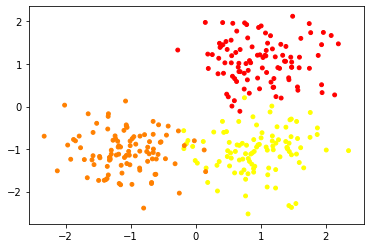

In [4]:
plt.scatter(x[:,0], x[:,1], c=labels, s=15, cmap="autumn")

In [5]:
af = AffinityPropagation(preference=-50).fit(x)

/Library/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


In [6]:
cluster_center_ids = af.cluster_centers_indices_

In [7]:
labels = af.labels_

In [8]:
n_clust = len(cluster_center_ids)
n_clust

3

In [9]:
def report_affinity_propagation(x):
    af = AffinityPropagation(preference=-50).fit(x)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    
    print("Numero estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Informacion mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(x, labels, metric="sqeuclidean")) 
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = x[cluster_center_ids[k]]
        plt.plot(x[class_members,0], x[class_members, 1], col + ".")
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in x[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1], x[1]], col)
            
            
    plt.show()
    
    

/Library/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


Numero estimado de clusters: 3
Homogeneidad: 1.000
Completitud: 1.000
V-measure: 1.000
R2 ajustado: 1.000
Informacion mutua ajustada: 1.000
Coeficiente de la silueta: 0.753


IndexError: index 250 is out of bounds for axis 0 with size 2

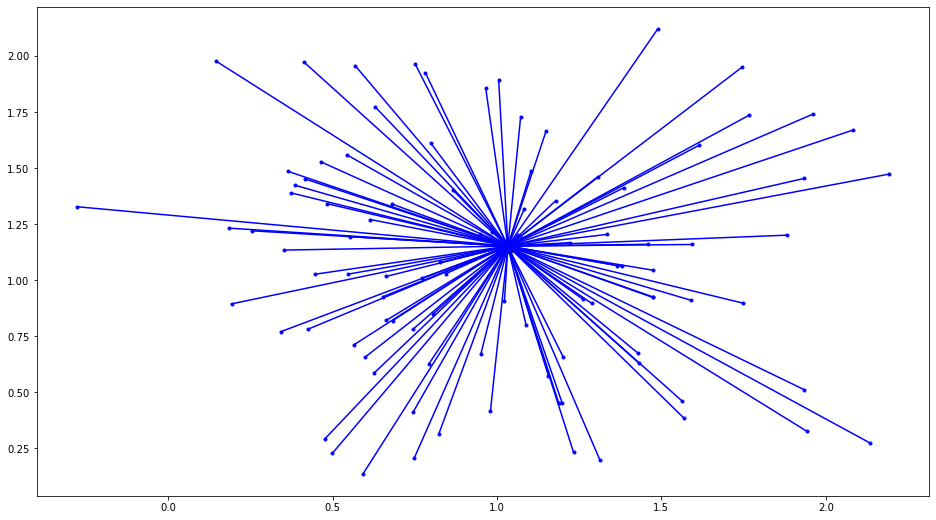

In [10]:
report_affinity_propagation(x)